# Bias - Variance

In [1]:
import pandas as pd
import math
import numpy as np
import math
import pandas as pd
import seaborn as sns
import numpy.linalg as la
import scipy.optimize as op
from scipy.stats import norm
from scipy.io import loadmat
from scipy.optimize import minimize
from matplotlib import pyplot as plt

## Load and plot data

In [2]:
data = loadmat('data/ex5data1.mat')
print('data keys:', data.keys())
Xtrain = data['X']
ytrain = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']

data keys: dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])


In [3]:
print('Xtrain.shape:', Xtrain.shape)
print('ytrain.shape:', ytrain.shape)
print('Xtest.shape:', Xtest.shape)
print('ytest.shape:', ytest.shape)
print('XCV.shape:', Xval.shape)
print('yCV.shape:', yval.shape)

Xtrain.shape: (12, 1)
ytrain.shape: (12, 1)
Xtest.shape: (21, 1)
ytest.shape: (21, 1)
XCV.shape: (21, 1)
yCV.shape: (21, 1)


In [4]:
# Visualize the example dataset
dTrain = np.column_stack([Xtrain, ytrain])

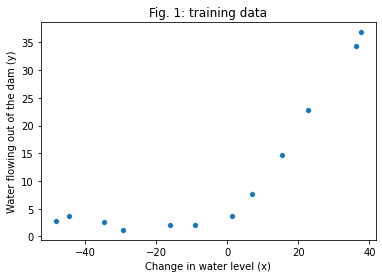

In [5]:
fig = sns.scatterplot(dTrain[:,0], dTrain[:,1])

plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.title("Fig. 1: training data") # You can comment this line out if you don't need title
plt.show(fig)


## Fitting linear regression

In [42]:
def costFuncRegLinear(theta, X, y, lambda_):
    theta = theta.reshape([-1,1])
    m = X.shape[0] 
    J = 0.5/m * ((la.norm(X @ theta - y)) **2 + lambda_ * la.norm(theta) **2)

    grad = 1/m *((X.T @ (X @ theta - y)) + lambda_ * theta)

    return J, grad.flatten()

def f(theta, X, y, lambda_):
    return costFuncRegLinear(theta, X, y, lambda_)[0]

def fprime(theta, X, y,lambda_):
    return costFuncRegLinear(theta, X, y, lambda_)[1]

In [40]:
# Initialize theta
m = Xtrain.shape[0]
n = Xtrain.shape[1]
initial_theta = np.zeros([n+1, 1])

# add bias term
myXtrain = np.column_stack([np.ones([m,1]), Xtrain])

J = f(init_theta, myXtrain, ytrain, 1)
grad = fprime(init_theta, myXtrain, ytrain, 1)
print('Using theta initialized at [1, 1], we see an output of %f\n'% J,
     'and gradient of \n', grad)

f: theta (2, 1)
Using theta initialized at [1, 1], we see an output of 304.034859
 and gradient of 
 [-15.21968234 598.25074417]


In [125]:
op.fmin_bfgs?


In [43]:
learned_theta = op.fmin_bfgs(f = f, 
                x0 = initial_theta.flatten(), 
                fprime = fprime,
                args = (myXtrain, ytrain, 0),
                full_output=True)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5


In [48]:
# fmin_bfgs actually calls minimize function
res = op.minimize(f, initial_theta.flatten(), args =(myXtrain, ytrain, 0), method='BFGS', tol=1e-6)

In [58]:
# Note that the results are the same
print(learned_theta[0], res['x'])

[13.08790351  0.36777923] [13.08790327  0.36777922]


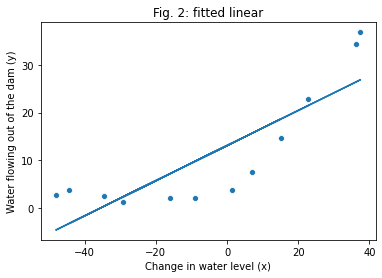

In [70]:
fig = sns.scatterplot(dTrain[:,0], dTrain[:,1])

plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.plot(Xtrain, learned_theta[0][0] + learned_theta[0][1] * Xtrain, '-')
plt.title("Fig. 2: fitted linear") 
plt.show(fig)


## Learning curve

In [74]:
def learningCurve(X, y, Xval, yval, lambda_)
    # Generates the train and cross validation set errors needed to plot a learning curve.
    # In particular, it returns two vectors of the same length - error_train and error_val. 
    # Then, error_train[i] contains the training error for i examples (and similarly for error_val[i]).
    
    # Number of training examples
    m = X.shape[0] 


% Note: You should evaluate the training error on the first i training
%       examples (i.e., X(1:i, :) and y(1:i)).
%
%       For the cross-validation error, you should instead evaluate on
%       the _entire_ cross validation set (Xval and yval).
%
% Note: If you are using your cost function (linearRegCostFunction)
%       to compute the training and cross validation error, you should 
%       call the function with the lambda argument set to 0. 
%       Do note that you will still need to use lambda when running
%       the training to obtain the theta parameters.
%
% Hint: You can loop over the examples with the following:
%
%       for i in range(m):
%           # Randomly choose i examples
            trX = X[np.random.choice(X.shape[0], i, replace=False)]

            
%           % X(1:i, :) and y(1:i), storing the result in 
%           % error_train(i) and error_val(i)
%           ....
%           
%       end
%

% ---------------------- Sample Solution ----------------------





    return error_train, error_val


SyntaxError: invalid syntax (<ipython-input-74-4b561aedee3d>, line 1)

In [75]:
from random import randint
# seed random number generator

# generate some integers
for _ in range(10):
    value = randint(0, 10)
    print(value)

3
10
3
10
6
3
7
7
10
7
